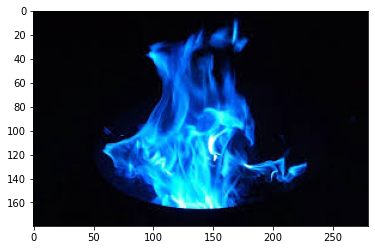

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/intern.htmhieu/Downloads/Training Dataset"

CATEGORIES = ["Fire", "NoFire"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,1)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

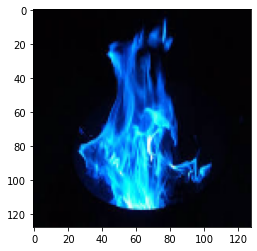

In [2]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [3]:
training_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,1)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()


100%|██████████████████████████████████████████████████████████████████████████████| 3553/3553 [00:45<00:00, 77.71it/s]


In [4]:
print(len(training_data))

7434


In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
1
1
1
0
0


In [7]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

[[[[ 36  39  57]
   [ 21  26  37]
   [ 22  30  45]
   ...
   [ 91 118 134]
   [ 88 119 140]
   [ 89 120 140]]

  [[ 31  38  64]
   [ 20  27  46]
   [ 22  29  54]
   ...
   [ 84 122 140]
   [ 78 120 142]
   [ 76 119 140]]

  [[ 29  33  64]
   [ 19  23  48]
   [ 27  34  60]
   ...
   [ 84 123 145]
   [ 81 122 146]
   [ 79 121 144]]

  ...

  [[ 33  38  36]
   [ 33  39  34]
   [ 35  38  36]
   ...
   [ 27  30  28]
   [ 26  30  28]
   [ 26  30  28]]

  [[ 37  40  38]
   [ 38  41  39]
   [ 38  41  39]
   ...
   [ 27  32  30]
   [ 26  31  29]
   [ 27  32  30]]

  [[ 41  44  42]
   [ 40  43  42]
   [ 40  43  42]
   ...
   [ 31  34  32]
   [ 31  34  32]
   [ 31  34  32]]]]


In [8]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [9]:
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()